In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
train_tf <- read.csv(("./Data/Titanic_train.csv"))
head(train_tf)
tail(train_tf)
library(caret)
library(e1071)
library(nnet)

,X...PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,X...PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


Loading required package: ggplot2

Loading required package: lattice



In [3]:
str(train_tf)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### 컬럼 내용 확인
- survived : 생존여부, 0=no, 1=yes
- Pclass : 티켓등급, 1=1st, 2=2nd, 3=3rd
- Sibsp : 함꼐 합승한 형제,자매,배우자의 수 
- Parch : 함께 탑승한 부모, 자식의 수
- Fare : 운임 
- Cabin : 객실 번호
- Embarked : 탑승항구, S= Southhampton, C = Chersbourg, Q=Queenstown

##  EDA 
탐색적 데이터 분석
- 무었이 타겟과 관련이 있는 컬럼일까


선택한 타겟이 타겟으로 작동한지 생각하자 
제일 좋은건 5:5 
Feature 가 5:5 면 사용할수없다 최소 6:4 


In [4]:
# 결측치 
# 결측치가 전체 데이터의 20% 를 넘으면 못씀
colSums(is.na(train_tf))
# 나이가 177개 NA 

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [3]:
177/891
nrow(train_tf)

[1] 0.1986532

[1] 891

In [6]:
# train_tf#Age 가 NA인것 빼고 데이터셋 만들기
subset(train_tf, !is.na(train_tf$Age))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


In [7]:
# Survived 기준으로 정렬
library(dplyr)
train_tf <- arrange(train_tf, train_tf$Survived)
train_tf



다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,,Q


In [8]:
tail(train_tf)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


# Target Column 성립한가?

In [9]:
# Survived 의 생존과 사망의 비율 검토
table(train_tf$Survived)
nrow(train_tf)

342 / 891 * 100

round(nrow(subset(train_tf, Survived == 0)) / nrow(train_tf) * 100,2)



  0   1 
549 342 

[1] 891

[1] 38.38384

[1] 61.62

In [10]:
# 너무김
label = c(paste("사망\n",round(nrow(subset(train_tf, Survived == 0)) / nrow(train_tf) * 100,2),"%")
, paste("사망\n",round(nrow(subset(train_tf, Survived == 1)) / nrow(train_tf) * 100,2),"%")
)



In [11]:
# 짧은버전 
# 1

aa <- data.frame(c(table(train_tf$Survived)))
aa

aa[3,]

lable2 = round(c(paste(("사망",aa[1,] / nrow(train_tf) * 100,"%")),paste("생존", aa[2,] /nrow(train_tf)  * 100,"%" )),2)


par(family = 'AppleGothic',bg = 'white')
pie3D(table(train_tf$Survived),
    main = "타이타닉호 생존율",
    labels = lable2,
     labelcex = 1.2,
     radius = 0.9, 
     explode = 0.05
)

ERROR: Error in parse(text = x, srcfile = src): <text>:9:29: 예기치 않은 ','입니다
8: 
9: lable2 = round(c(paste(("사망",
                               ^


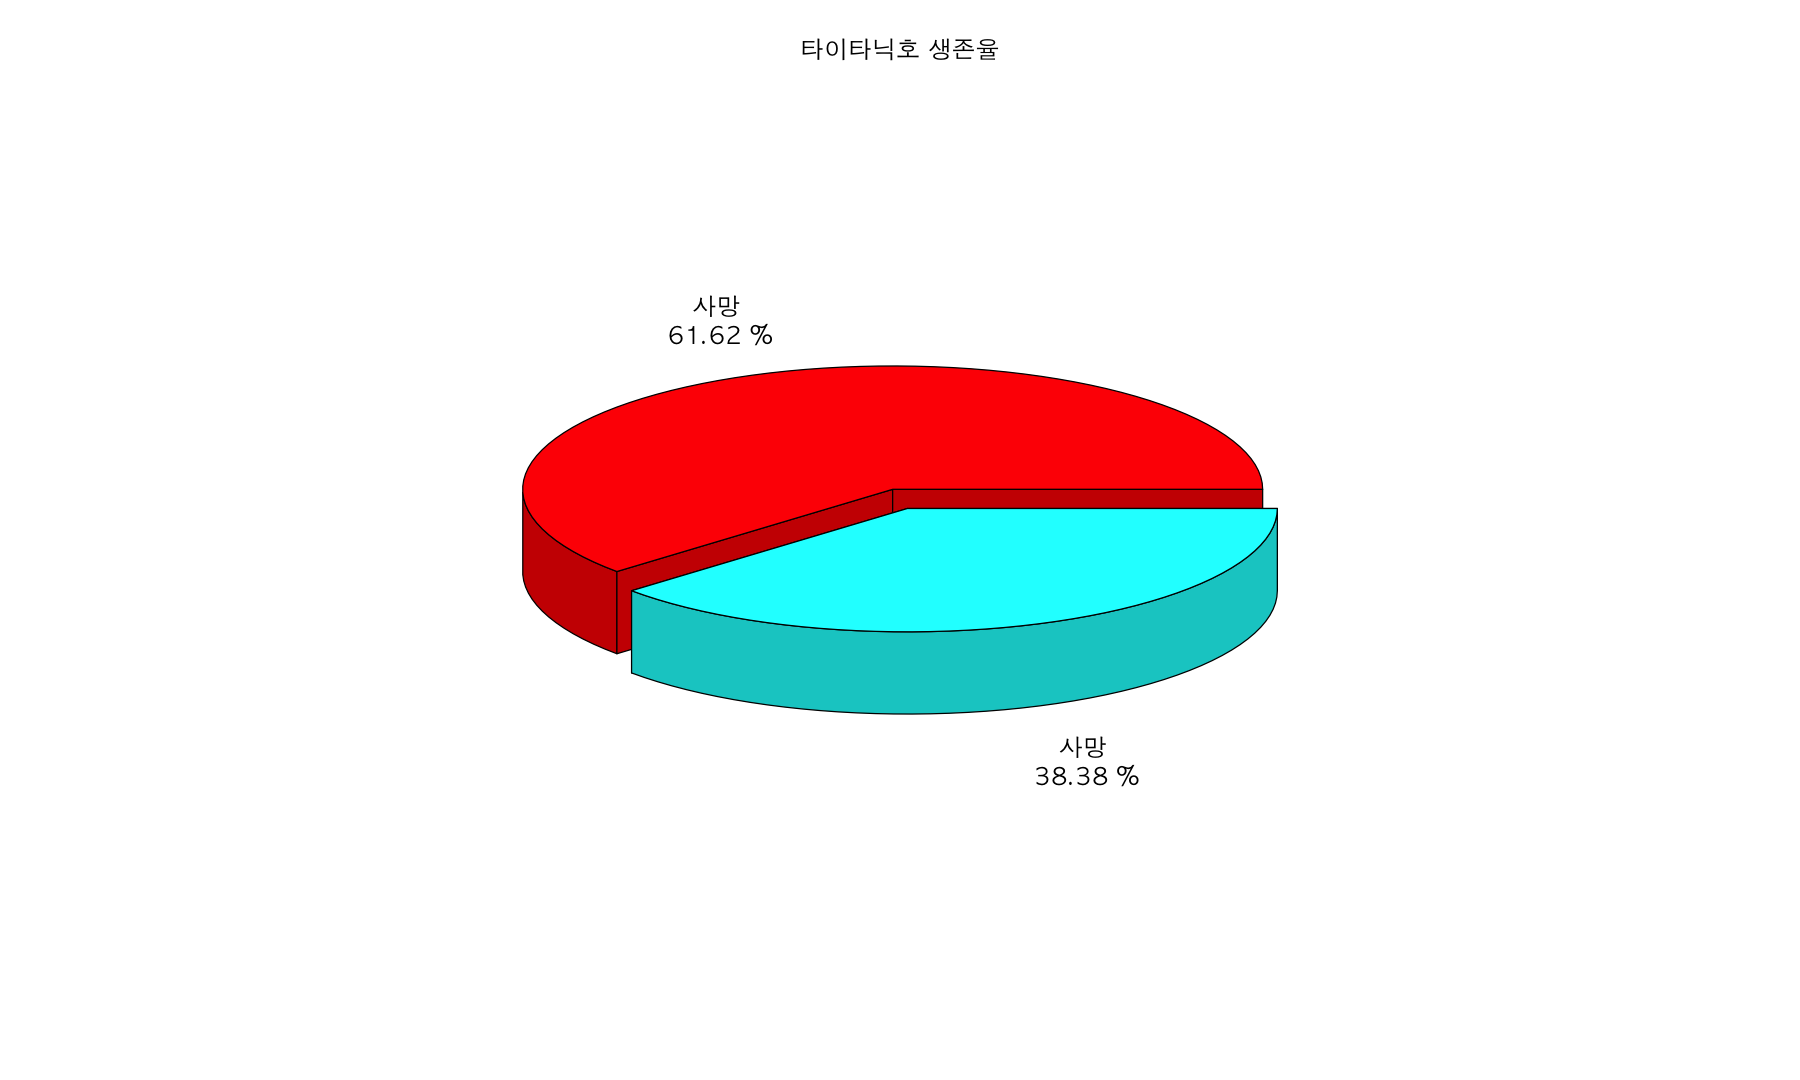

In [ ]:
library(plotrix)
par(family = 'AppleGothic',bg = 'white')
pie3D(table(train_tf$Survived),
    main = "타이타닉호 생존율",
    labels = label,
     labelcex = 1.2,
     radius = 0.9, 
     explode = 0.05
)

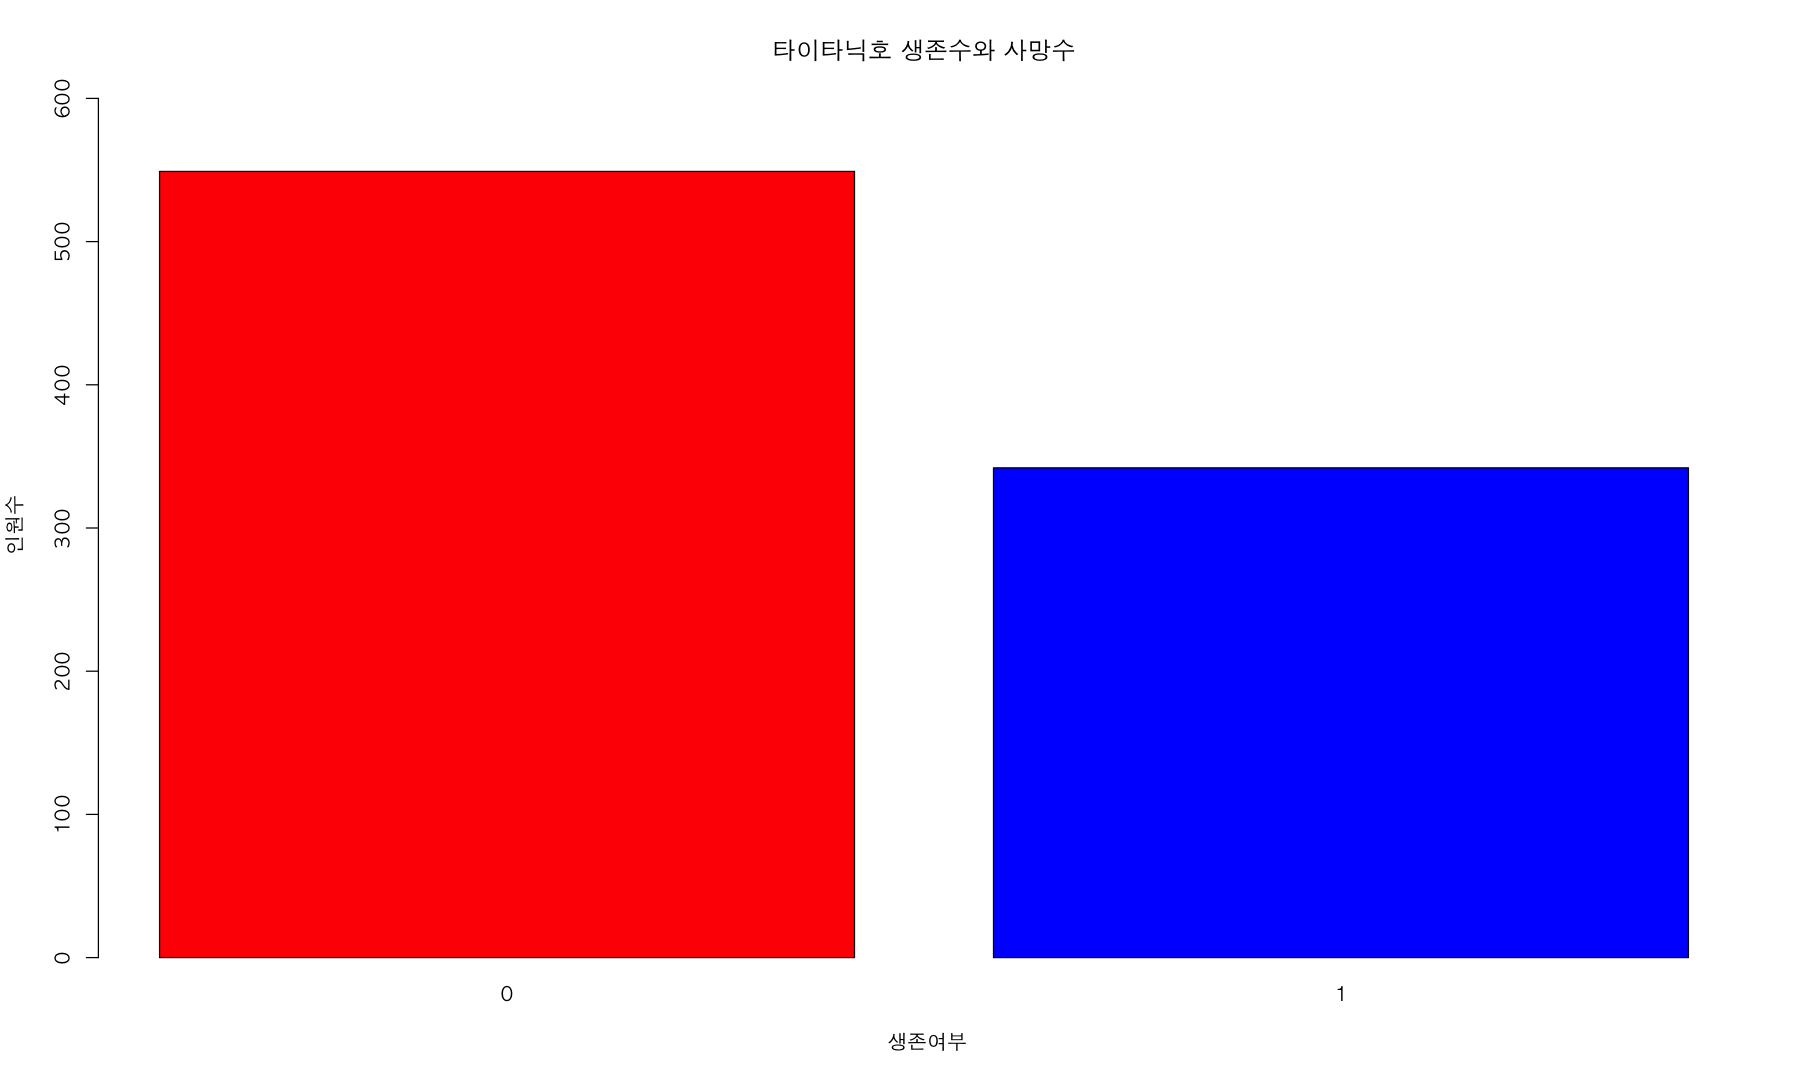

In [ ]:
par(family = 'AppleGothic',bg = 'white')
barplot(table(train_tf$Survived),
           main = "타이타닉호 생존수와 사망수" ,
           xlab = " 생존여부",
           ylab = " 인원수",
           ylim = c(0,600),
           col = ifelse( train_tf$Survived == 0, 'red','blue'),
           
           )

Survived 컬럼은 Target 으로 적합하다

Feature Colunm

In [ ]:
head(train_tf)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [ ]:
# Sex 컬럼 분류 확인
table(train_tf$Sex)
nrow(train_tf)


female   male 
   314    577 

[1] 891

In [ ]:
# 여성의 인원과 남성의 인원 확인




In [ ]:
# 여성의 생존과 사망 인원
#table(subset(train_tf$Sex,Sex == 'male'))
#apply(subset(train))
#apply(subset(train_tf, Sex == 'male'),2,sum)
 
#dd <- subset(train_tf, Sex == 'male')

#apply(dd,,sum)
# 남성의 생존과 사망 인원
# 84, 233
# 468, 105 
#aggregate(train_tf$Sex ~ train_tf$Survived, train_tf,sum)





In [ ]:
#table()
nrow(subset(train_tf, Sex == 'male'))
qqq <- subset(train_tf, Sex == 'male') 
www <- subset(train_tf, Sex == 'female') 

 nrow(subset(qqq, Survived == 0))

  nrow(subset(qqq, Survived == 1))
nrow(subset(train_tf, Sex == 'female'))
   nrow(subset(www, Survived == 0))

  nrow(subset(www, Survived == 1))




[1] 577

[1] 468

[1] 109

[1] 314

[1] 81

[1] 233

In [ ]:
par(family = 'AppleGothic',bg = 'white')
pie3D()

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: 예상하지 못한 입력의 끝(end of input)입니다.
1: par(family = 'AppleGothic',bg = 'white')
2: pie3D(table()
  ^


In [ ]:
head(train_tf)
nrow(subset(train_tf, Sex == 'female'))
nrow(subset(train_tf, Sex == 'male'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] 314

[1] 577

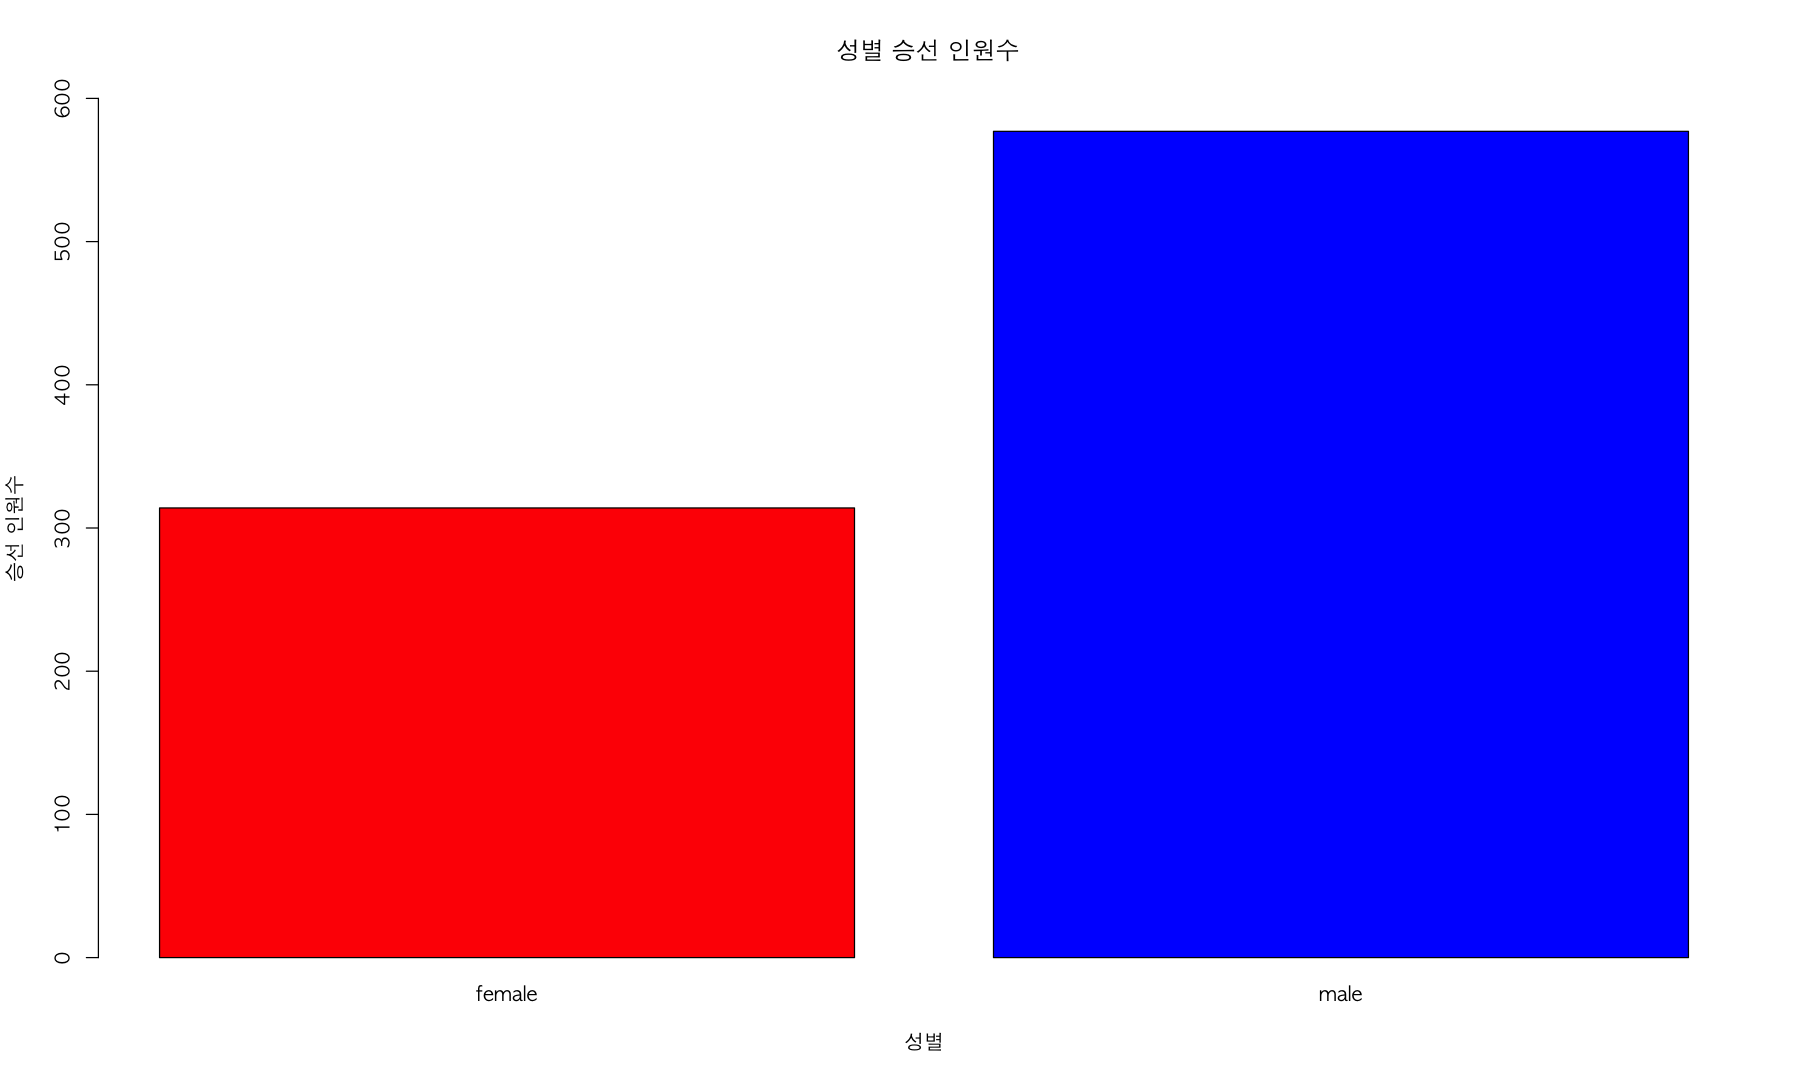

In [ ]:
par(family = 'AppleGothic',bg = 'white')
barplot(table(train_tf$Sex),
         ylim = c(0,600),
         col = ifelse(train_tf$Sex =='female','blue','red'),
          ylab = "승선 인원수",
          xlab = "성별",
          main = " 성별 승선 인원수",
           )


In [ ]:
# 티켓등급 분류 
    table(train_tf$Pclass)


  1   2   3 
216 184 491 

In [ ]:
# 1등 객실의 여성 생존율
head(train_tf)

vvv <- train_tf[c(3,2,5)]
vvv2 <- subset(vvv, Sex == 'female')
vvv3 <- subset(vvv2, Pclass == 1)
nrow(subset(vvv3, Survived == 1))
nrow(subset(vvv2, Pclass == 1))

cat(paste("1등 객실의 여성 생존율은",nrow(subset(vvv3, Survived == 1)),"/", nrow(subset(vvv2, Pclass == 1)),",", round(91/94 * 100,2),"%"  ))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


[1] 91

[1] 94

1등 객실의 여성 생존율은 91 / 94 , 96.81 %

In [ ]:
# 1,2,3 등 객실의 여성 생존율을 for문을 이용해 해결
for(i in 1:3) {

    cat(i, "등 객실의 여성 생존율은 ", nrow(subset(train_tf, (Pclass == i) & (Sex == 'female') & (Survived == 1) )), "/", nrow(subset(train_tf, (Pclass == i) & (Sex == 'female'))),",", round(nrow(subset(train_tf, (Pclass == i) & (Sex == 'female') & (Survived == 1) )) / nrow(subset(train_tf, (Pclass == i) & (Sex == 'female'))) * 100,2), "%\n")  
}

1 등 객실의 여성 생존율은  91 / 94 , 96.81 %
2 등 객실의 여성 생존율은  70 / 76 , 92.11 %
3 등 객실의 여성 생존율은  72 / 144 , 50 %


In [ ]:
for(i in 1:3) {
  
    cat(i, "등 객실의 남성 생존율은 ", nrow(subset(train_tf, (Pclass == i) & (Sex == 'male') & (Survived == 1) )), "/", nrow(subset(train_tf, (Pclass == i) & (Sex == 'male'))),",", round(nrow(subset(train_tf, (Pclass == i) & (Sex == 'male') & (Survived == 1) )) / nrow(subset(train_tf, (Pclass == i) & (Sex == 'male'))) * 100,2), "%\n")  
}

1 등 객실의 남성 생존율은  45 / 122 , 36.89 %
2 등 객실의 남성 생존율은  17 / 108 , 15.74 %
3 등 객실의 남성 생존율은  47 / 347 , 13.54 %


In [ ]:
# 1,2,3 등 객실의 남성과 여성 생존율을 for문을 통해 해결
for(j in 1:2) {
for(i in 1:3) {
 cat(i, "등 객실의", ifelse(j == 1, '여성','남성') ,"생존율은 ", nrow(subset(train_tf, (Pclass == i) & (Sex == ) & (Survived == 1) )), "/", nrow(subset(train_tf, (Pclass == i) & (ifelse(j == 1, 'female','male')))),",", round(nrow(subset(train_tf, (Pclass == i) & (Sex == 'female') & (Survived == 1) )) / nrow(subset(train_tf, (Pclass == i) & (Sex == 'female'))) * 100,2), "%\n")  

}
}


ERROR: Error in parse(text = x, srcfile = src): <text>:4:100: 예기치 않은 ')'입니다
3: for(i in 1:3) {
4:  cat(i, "등 객실의", ifelse(j == 1, '여성','남성') ,"생존율은 ", nrow(subset(train_tf, (Pclass == i) & (Sex == )
                                                                                                      ^


In [ ]:
data.frame()

ERROR: Error in append(22): 기본값이 없는 인수 "values"가 누락되어 있습니다


In [ ]:
for (i in 1: 3) {
  x <- round(nrow(subset(train_tf, (Pclass == i) & (Sex == 'male') & (Survived == 1) )) / nrow(subset(train_tf, (Pclass == i) & (Sex == 'male'))) * 100,2)

x

}
x

[1] 13.54

In [ ]:
for (i in 1: 3) {
male  <- round(nrow(subset(train_tf, (Pclass == 2) & (Sex == 'male') & (Survived == 1) )) / nrow(subset(train_tf, (Pclass == 2) & (Sex == 'male'))) * 100,2)

}


In [ ]:
barplot()

ERROR: Error in barplot.default(): 기본값이 없는 인수 "height"가 누락되어 있습니다


In [ ]:
head(train_tf)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [ ]:
# Embarked 
table(train_tf$Embarked)


      C   Q   S 
  2 168  77 644 

In [ ]:
# 빈칸의 데이터 찾기
subset(train_tf, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [ ]:
train_tf2 <- train_tf

In [ ]:
# 항구별 탑승인원수를 구하여 가장 많은 탑승인원의 항구로 결정
# S 항구
# C 항구
# Q 항구

# 빈칸 항구 찾기 - 1

subset(train_tf2, Embarked == "")

#빈칸 항구 찾기 - 2
train_tf2[train_tf2$Embarked =="",]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [ ]:
# 빈 항구의 인원을 S항구로 변경 -1 
train_tf2$Embarked <- ifelse(train_tf2$Embarked == "" , 'S',train_tf2$Embarked )
train_tf2[train_tf2$Embarked =="",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>


In [ ]:
train_tf2 <- train_tf

In [ ]:
# 빈 항구의 인원을 S항구로 변경 -2 
train_tf2[train_tf2$Embarked == "",]$Embarked <- 'S'


ERROR: Error in `$<-.data.frame`(`*tmp*`, Embarked, value = "S"): replacement has 1 row, data has 0


In [ ]:
train_tf2[train_tf2$Embarked == "",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>


In [ ]:
train_tf[train_tf$Embarked == "",]$Embarked <- 'S'

In [ ]:
table(train_tf$Embarked)


  C   Q   S 
168  77 646 

In [ ]:
#subset(train_tf, Embarked)

train_tf$Embarked

[1] "S" "S" "Q" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "C" "S" "C"
 [19] "S" "S" "S" "S" "S" "C" "S" "Q" "C" "S" "S" "S" "C" "C" "S" "C" "S" "S"
 [37] "C" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
 [55] "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "C" "S"
 [73] "Q" "S" "C" "S" "S" "S" "C" "S" "Q" "S" "C" "S" "S" "S" "C" "S" "S" "C"
 [91] "C" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S"
[109] "S" "S" "S" "S" "S" "Q" "S" "C" "S" "S" "C" "S" "S" "S" "C" "S" "S" "Q"
[127] "S" "S" "Q" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "Q" "S" "S" "S"
[145] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "C" "Q"
[163] "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "Q"
[181] "Q" "S" "S" "S" "C" "S" "C" "S" "S" "C" "C" "S" "S" "S" "C" "S" "S" "S"
[199] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C"
[217] "S" "C" "S" "S" "S" "C" "C" "S" "Q" "S" "S" "S" "C" "S" "C" "C" "S" "S"
[235] "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[253] "Q" "S" "S" "S" "S" "C" "Q" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S"
[271] "S" "S" "S" "C" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S"
[289] "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "C" "S" "C" "S" "S"
[307] "S" "S" "Q" "Q" "S" "C" "S" "S" "S" "S" "Q" "S" "S" "C" "C" "Q" "S" "S"
[325] "S" "C" "C" "S" "S" "S" "S" "S" "C" "S" "S" "S" "Q" "S" "C" "Q" "S" "S"
[343] "S" "S" "S" "S" "S" "C" "S" "S" "C" "S" "C" "C" "S" "S" "S" "S" "S" "Q"
[361] "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "C" "S"
[379] "S" "S" "Q" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[397] "Q" "S" "S" "Q" "S" "C" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[415] "S" "Q" "S" "S" "S" "C" "S" "S" "S" "C" "S" "S" "S" "C" "S" "C" "Q" "S"
[433] "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S"
[451] "S" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "C"
[469] "Q" "Q" "S" "S" "S" "S" "C" "S" "Q" "Q" "S" "S" "S" "S" "Q" "C" "Q" "S"
[487] "S" "C" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[505] "C" "S" "S" "S" "S" "Q" "S" "C" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S"
[523] "C" "S" "S" "S" "C" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[541] "S" "S" "S" "S" "S" "Q" "S" "S" "Q" "C" "S" "S" "S" "C" "S" "S" "S" "S"
[559] "C" "S" "Q" "S" "S" "Q" "C" "Q" "C" "C" "C" "Q" "Q" "C" "S" "S" "S" "S"
[577] "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "S" "Q" "S"
[595] "C" "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "Q" "S"
[613] "S" "S" "S" "C" "C" "Q" "S" "C" "Q" "C" "S" "C" "S" "C" "S" "S" "S" "S"
[631] "S" "S" "Q" "S" "S" "C" "C" "S" "C" "S" "S" "S" "S" "S" "S" "S" "Q" "S"
[649] "S" "S" "S" "S" "Q" "S" "C" "S" "C" "Q" "Q" "Q" "S" "C" "C" "C" "C" "C"
[667] "S" "S" "S" "C" "Q" "S" "C" "S" "S" "C" "Q" "S" "C" "S" "S" "S" "S" "S"
[685] "S" "S" "S" "Q" "Q" "C" "C" "Q" "C" "C" "C" "S" "C" "C" "S" "S" "C" "S"
[703] "S" "C" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[721] "S" "S" "S" "S" "S" "S" "C" "S" "C" "C" "S" "S" "S" "C" "S" "C" "S" "S"
[739] "C" "S" "S" "C" "S" "S" "S" "S" "Q" "S" "C" "S" "S" "S" "C" "S" "S" "C"
[757] "S" "C" "C" "S" "S" "S" "C" "S" "C" "C" "S" "C" "S" "S" "S" "S" "S" "S"
[775] "Q" "S" "S" "S" "S" "C" "S" "C" "C" "S" "C" "S" "C" "S" "C" "S" "Q" "S"
[793] "S" "S" "C" "S" "S" "C" "S" "C" "S" "C" "C" "C" "S" "S" "Q" "S" "S" "S"
[811] "S" "S" "S" "C" "C" "S" "S" "C" "S" "Q" "C" "S" "S" "S" "S" "C" "C" "S"
[829] "C" "S" "S" "S" "S" "Q" "S" "C" "S" "C" "S" "S" "S" "S" "S" "S" "S" "C"
[847] "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S"
[865] "S" "C" "Q" "S" "C" "S" "C" "S" "C" "C" "C" "S" "S" "S" "S" "C" "S" "S"
[883] "C" "S" "S" "C" "C" "C" "S" "S" "C"

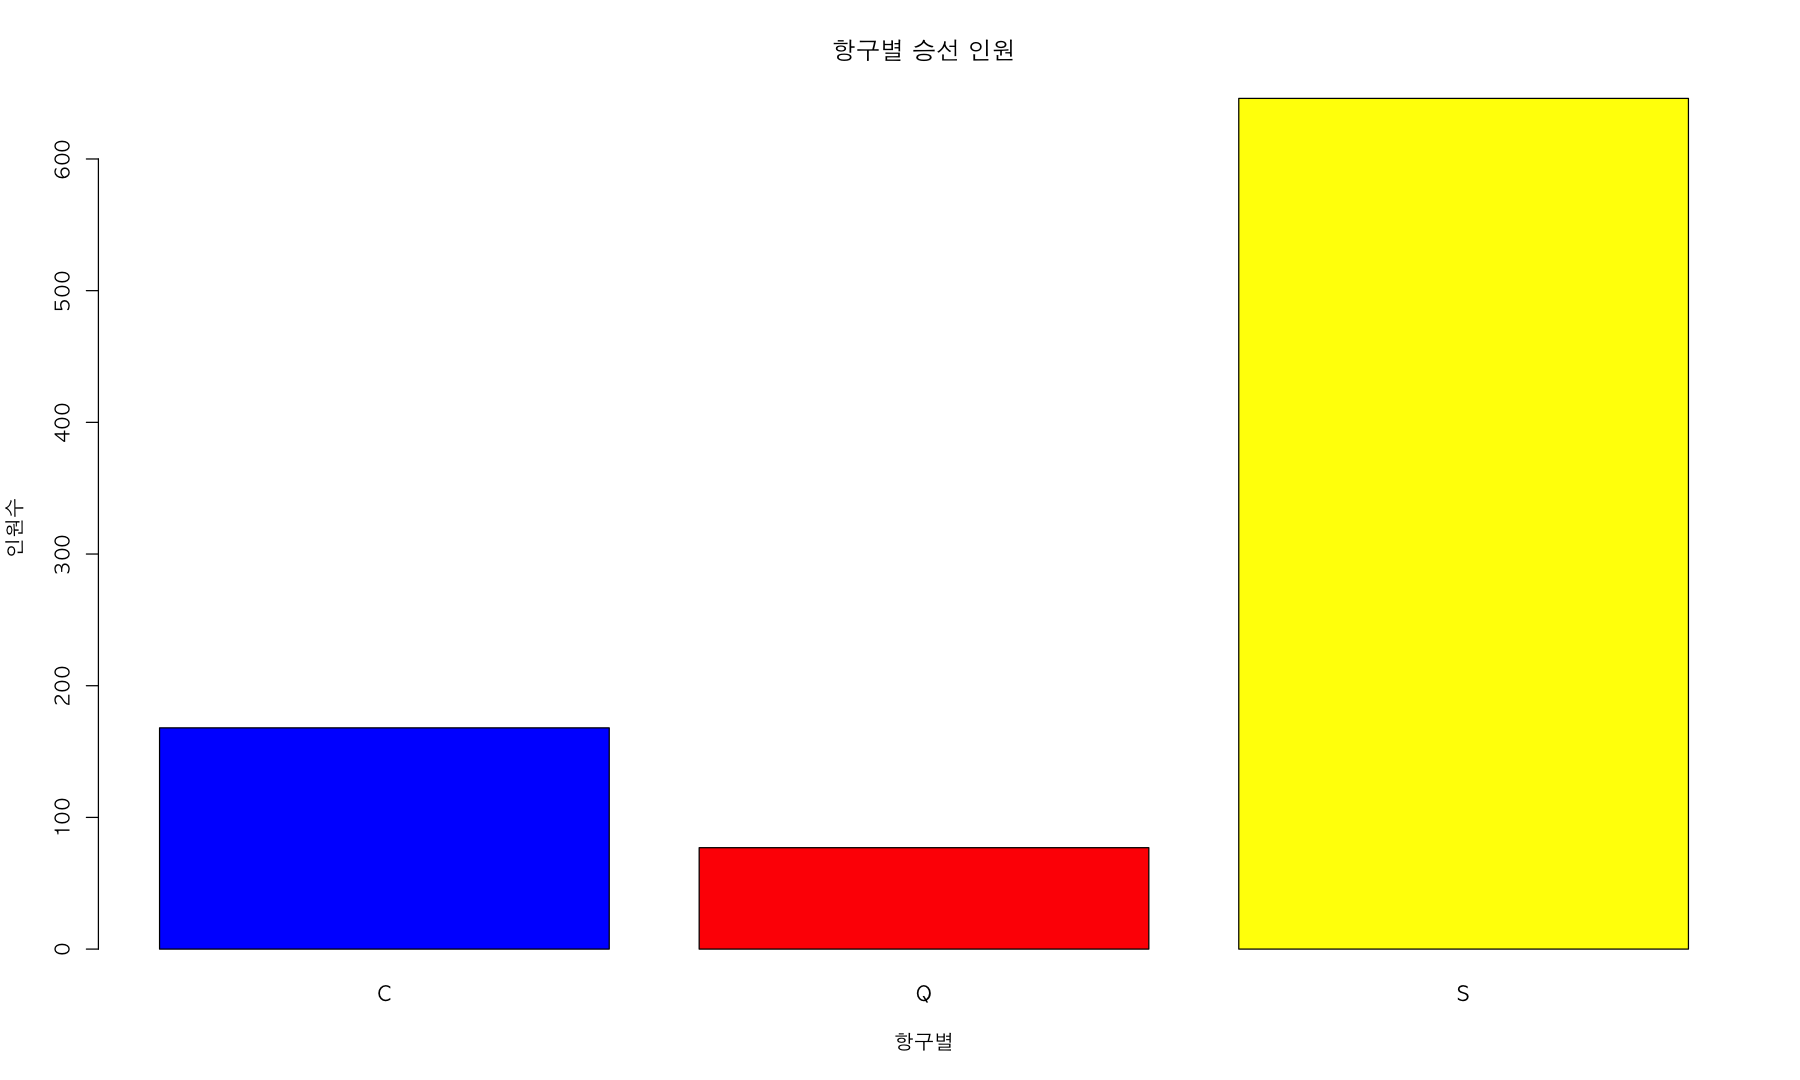

In [ ]:
par(family = 'AppleGothic',bg = 'white')
barplot(table(train_tf$Embarked),
         main = "항구별 승선 인원",
         xlab = "항구별",
         ylab = "인원수",
         col = c('blue','red','yellow'),
         
    
         )



In [ ]:
data3 <-  data.frame(table(train_tf$Embarked))
data3

Var1,Freq
<fct>,<int>
C,168
Q,77
S,646


In [ ]:
fe <-  subset(train_tf, Sex == 'female')
head(fe)
ma <-  subset(train_tf, Sex == 'male')
head(ma)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
8,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
10,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18.0000,,S
12,25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.0750,,S
21,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18.0000,,S
22,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.4750,,S
23,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27,1,0,11668,21.0000,,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [ ]:
par(family = 'AppleGothic',bg = 'white')
barplot(table(train_tf$Sex),
        beside = T,
)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:9: 예상하지 못한 기호(symbol)입니다.
2: barplot(table(train_tf$Sex)
3:         beside
           ^


In [ ]:

(c(train_tf$Embarked))

NULL

In [ ]:
 <- c(colnmatrain_tf$Embarked)

[1] "S" "S" "Q" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "C" "S" "C"
 [19] "S" "S" "S" "S" "S" "C" "S" "Q" "C" "S" "S" "S" "C" "C" "S" "C" "S" "S"
 [37] "C" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
 [55] "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "C" "S"
 [73] "Q" "S" "C" "S" "S" "S" "C" "S" "Q" "S" "C" "S" "S" "S" "C" "S" "S" "C"
 [91] "C" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S"
[109] "S" "S" "S" "S" "S" "Q" "S" "C" "S" "S" "C" "S" "S" "S" "C" "S" "S" "Q"
[127] "S" "S" "Q" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "Q" "S" "S" "S"
[145] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "C" "Q"
[163] "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "Q"
[181] "Q" "S" "S" "S" "C" "S" "C" "S" "S" "C" "C" "S" "S" "S" "C" "S" "S" "S"
[199] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C"
[217] "S" "C" "S" "S" "S" "C" "C" "S" "Q" "S" "S" "S" "C" "S" "C" "C" "S" "S"
[235] "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[253] "Q" "S" "S" "S" "S" "C" "Q" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S"
[271] "S" "S" "S" "C" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S"
[289] "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "C" "S" "C" "S" "S"
[307] "S" "S" "Q" "Q" "S" "C" "S" "S" "S" "S" "Q" "S" "S" "C" "C" "Q" "S" "S"
[325] "S" "C" "C" "S" "S" "S" "S" "S" "C" "S" "S" "S" "Q" "S" "C" "Q" "S" "S"
[343] "S" "S" "S" "S" "S" "C" "S" "S" "C" "S" "C" "C" "S" "S" "S" "S" "S" "Q"
[361] "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "C" "S"
[379] "S" "S" "Q" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[397] "Q" "S" "S" "Q" "S" "C" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[415] "S" "Q" "S" "S" "S" "C" "S" "S" "S" "C" "S" "S" "S" "C" "S" "C" "Q" "S"
[433] "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S"
[451] "S" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "C"
[469] "Q" "Q" "S" "S" "S" "S" "C" "S" "Q" "Q" "S" "S" "S" "S" "Q" "C" "Q" "S"
[487] "S" "C" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[505] "C" "S" "S" "S" "S" "Q" "S" "C" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S"
[523] "C" "S" "S" "S" "C" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[541] "S" "S" "S" "S" "S" "Q" "S" "S" "Q" "C" "S" "S" "S" "C" "S" "S" "S" "S"
[559] "C" "S" "Q" "S" "S" "Q" "C" "Q" "C" "C" "C" "Q" "Q" "C" "S" "S" "S" "S"
[577] "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "S" "Q" "S"
[595] "C" "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "Q" "S"
[613] "S" "S" "S" "C" "C" "Q" "S" "C" "Q" "C" "S" "C" "S" "C" "S" "S" "S" "S"
[631] "S" "S" "Q" "S" "S" "C" "C" "S" "C" "S" "S" "S" "S" "S" "S" "S" "Q" "S"
[649] "S" "S" "S" "S" "Q" "S" "C" "S" "C" "Q" "Q" "Q" "S" "C" "C" "C" "C" "C"
[667] "S" "S" "S" "C" "Q" "S" "C" "S" "S" "C" "Q" "S" "C" "S" "S" "S" "S" "S"
[685] "S" "S" "S" "Q" "Q" "C" "C" "Q" "C" "C" "C" "S" "C" "C" "S" "S" "C" "S"
[703] "S" "C" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[721] "S" "S" "S" "S" "S" "S" "C" "S" "C" "C" "S" "S" "S" "C" "S" "C" "S" "S"
[739] "C" "S" "S" "C" "S" "S" "S" "S" "Q" "S" "C" "S" "S" "S" "C" "S" "S" "C"
[757] "S" "C" "C" "S" "S" "S" "C" "S" "C" "C" "S" "C" "S" "S" "S" "S" "S" "S"
[775] "Q" "S" "S" "S" "S" "C" "S" "C" "C" "S" "C" "S" "C" "S" "C" "S" "Q" "S"
[793] "S" "S" "C" "S" "S" "C" "S" "C" "S" "C" "C" "C" "S" "S" "Q" "S" "S" "S"
[811] "S" "S" "S" "C" "C" "S" "S" "C" "S" "Q" "C" "S" "S" "S" "S" "C" "C" "S"
[829] "C" "S" "S" "S" "S" "Q" "S" "C" "S" "C" "S" "S" "S" "S" "S" "S" "S" "C"
[847] "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S"
[865] "S" "C" "Q" "S" "C" "S" "C" "S" "C" "C" "C" "S" "S" "S" "S" "C" "S" "S"
[883] "C" "S" "S" "C" "C" "C" "S" "S" "C"

In [ ]:
table(train_tf[c(5,12)])

        Embarked
Sex        C   Q   S
  female  73  36 205
  male    95  41 441

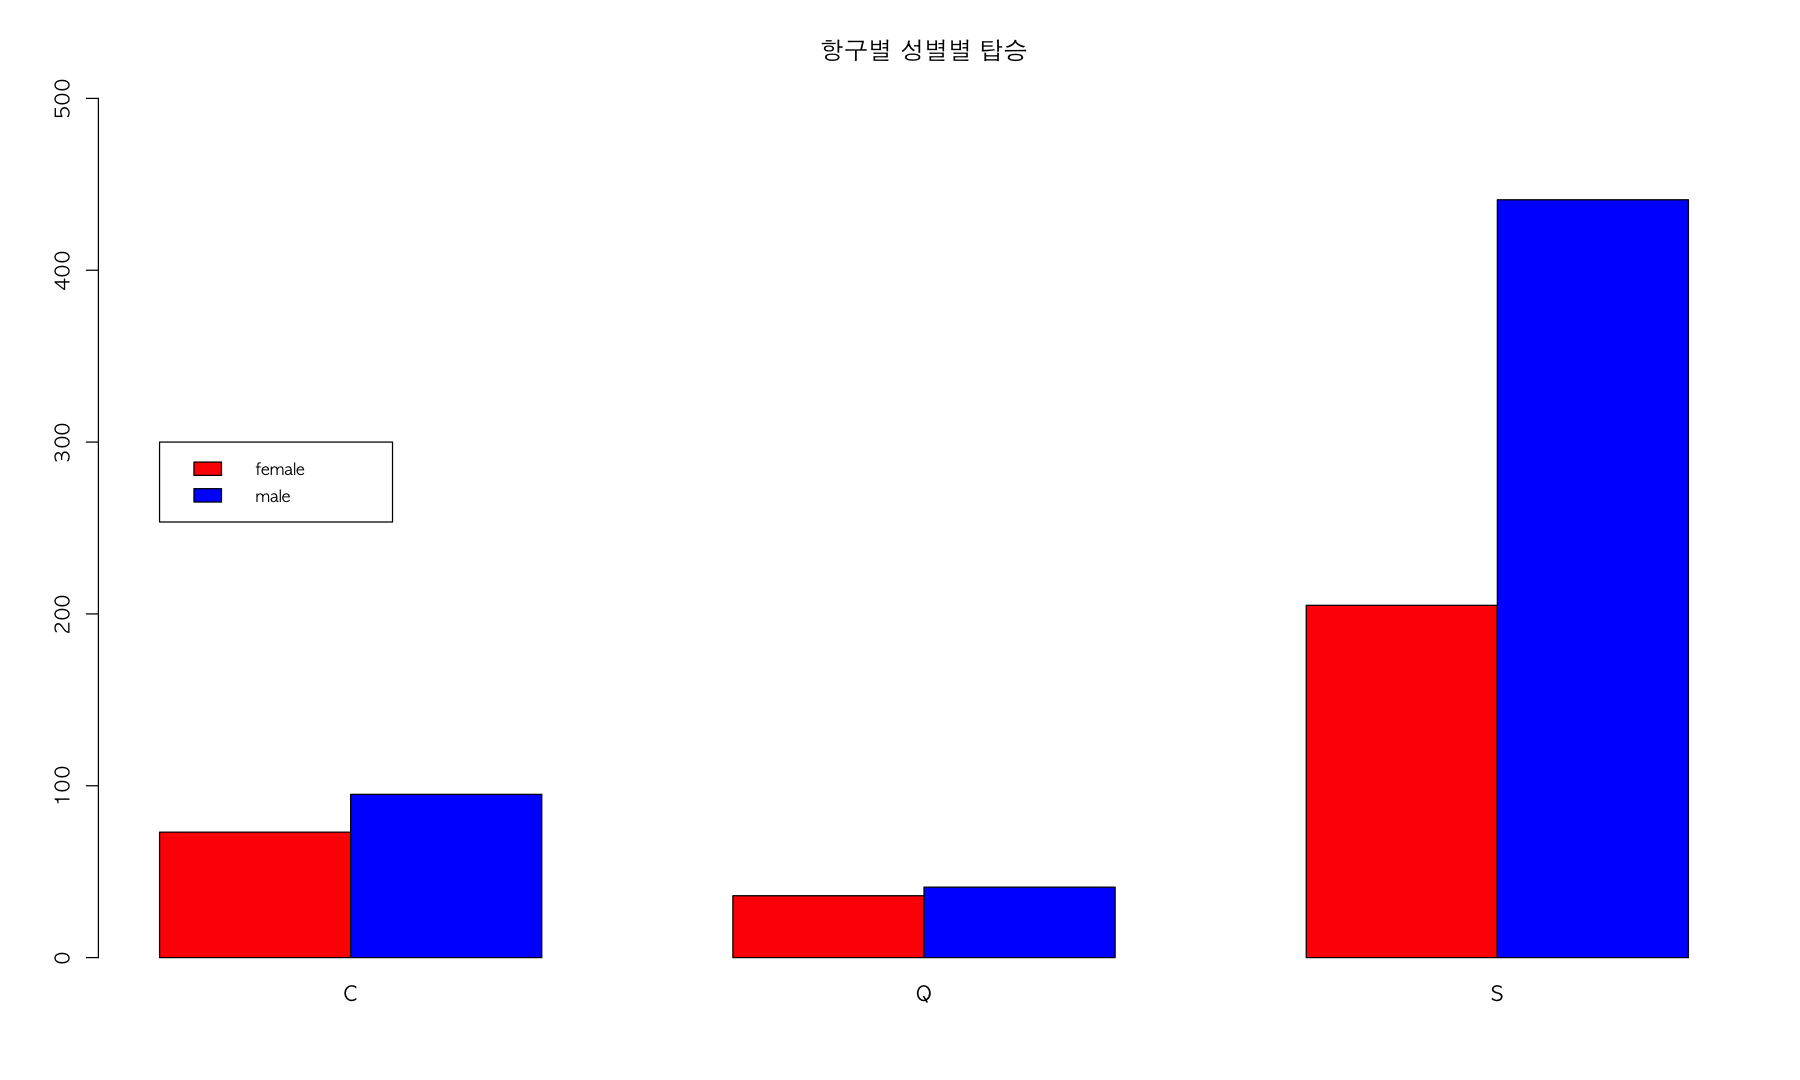

In [ ]:
par(family = 'AppleGothic',bg = 'white')
barplot(table(train_tf[c(5,12)]),
        beside = T,
        main = "항구별 성별별 탑승",
        col = c('red','blue'),
        ylim = c(0, 500)
        
        
)
legend(1,300,
        rownames(table(train_tf[c(5,12)])),
        fill = rep(c('red','blue'),3),
        cex =0.8
        )

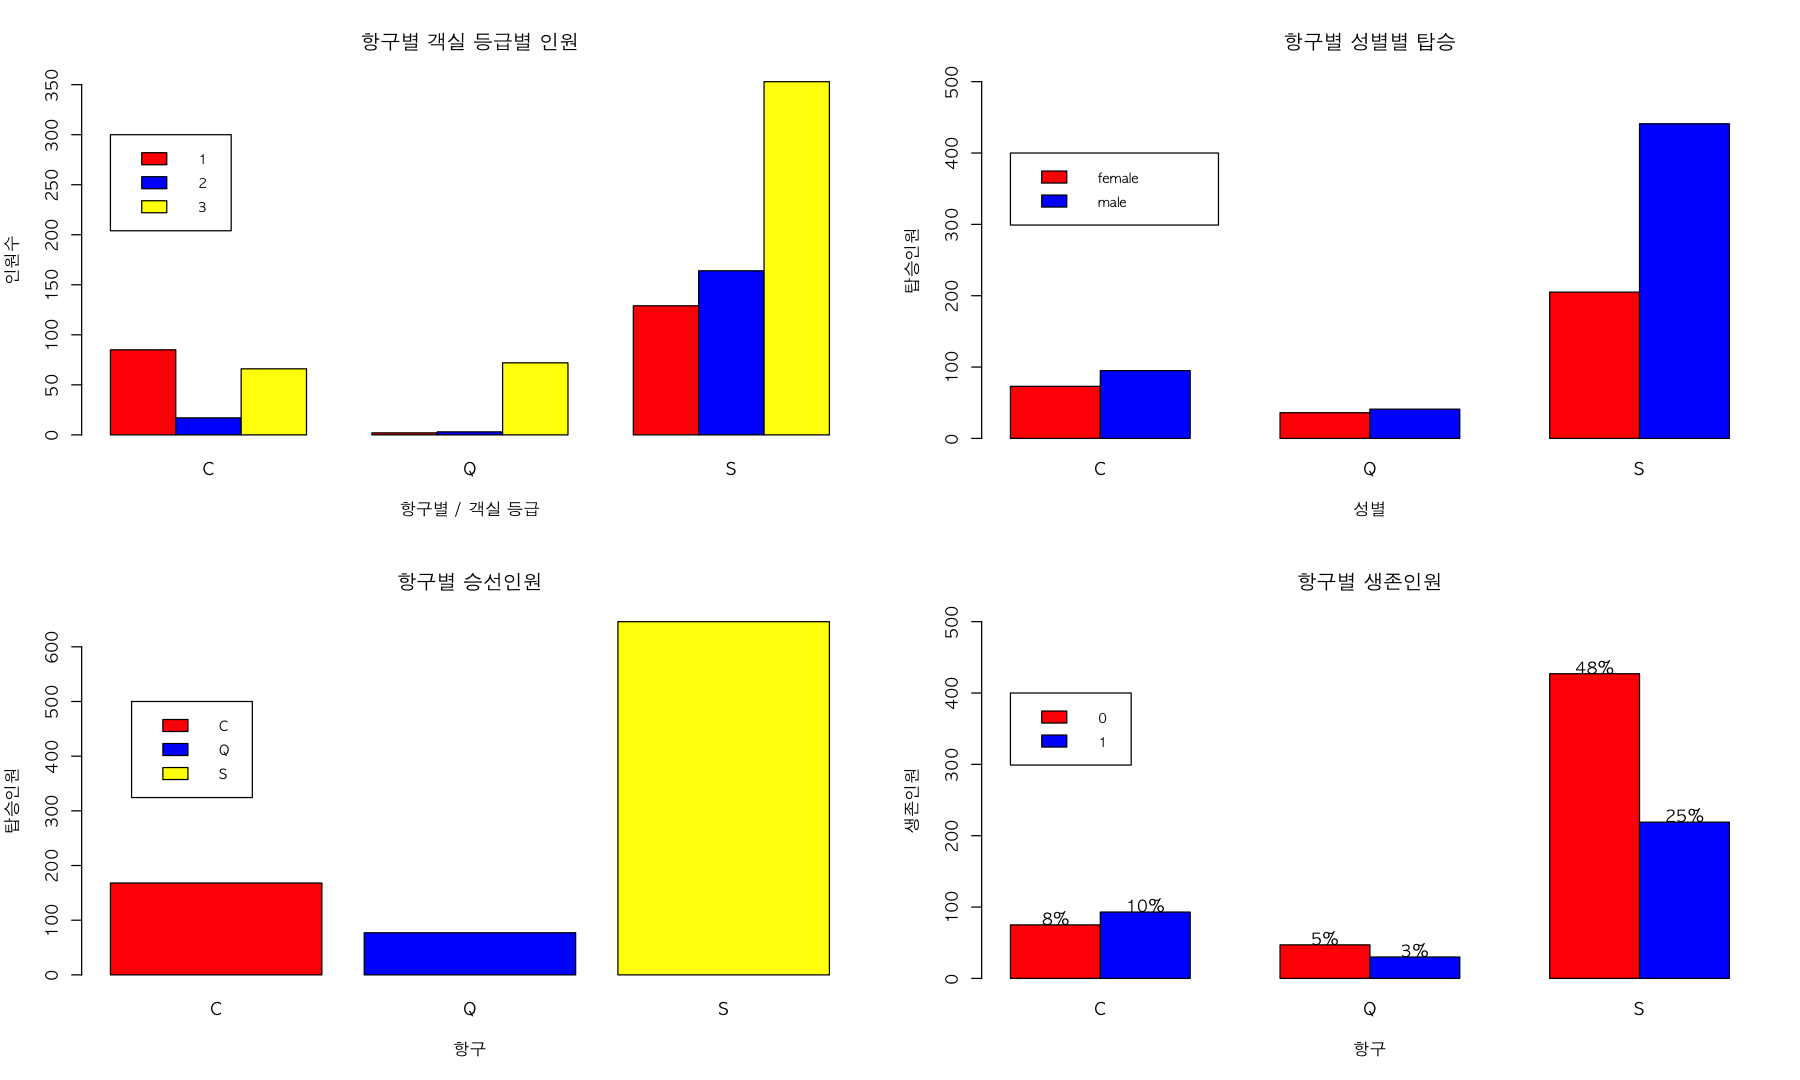

In [ ]:
par(family = 'AppleGothic',bg = 'white')
par(mfrow = c(2,2))
barplot(table(train_tf[c(3,12)]),
        beside = T,
        col = rep(c('red','blue','yellow'),3),
        main = "항구별 객실 등급별 인원",
        xlab = "항구별 / 객실 등급",
        ylab = "인원수",
)
legend(1,300,
        rownames(table(train_tf[c(3,12)])),
        fill = rep(c('red','blue','yellow'),3),
        cex =0.8
        )
        barplot(table(train_tf[c(5,12)]),
        beside = T,
        main = "항구별 성별별 탑승",
        col = c('red','blue'),
        ylim = c(0, 500),
        xlab = '성별',
        ylab = '탑승인원',
        
        
)
legend(1,400,
        rownames(table(train_tf[c(5,12)])),
        fill = rep(c('red','blue'),3),
        cex =0.8
        )
        # 항구별 승선인원, 항구별 생존인원
 barplot(table(train_tf$Embarked),
          main = '항구별 승선인원',
          col = c('red','blue','yellow'),
          xlab = '항구',
          ylab = '탑승인원',
          )
          legend(0.3,500,
        rownames(table(train_tf$Embarked)),
        fill = rep(c('red','blue','yellow'),3),
        cex =0.8
        )
barplot(table(train_tf[c(2,12)]),
        beside = T,
        ylim = c(0,500),
        col = rep(c('red','blue'),3),
        xlab = '항구',
        ylab = '생존인원',
        main = '항구별 생존인원',
        
)
  legend(1,400,
        rownames(table(train_tf[c(2,12)])),
        fill = rep(c('red','blue'),3),
        cex =0.8
        )
bar <- as.vector(table(train_tf[c(2,12)]))

text(c(1:2,4:5,7:8) + 0.5, as.vector(table(train_tf[c(2,12)])) + 10, paste0(round(bar / sum(bar) * 100), "%")) 
#  text(5,50, "THis is a 생픔", srt = 50)
#      1,2 , 4,5,  7,8


In [ ]:
c(1:2,4:5,7:8)

[1] 1 2 4 5 7 8

In [ ]:
head(train_tf)

 as.vector(table(train_tf[c(2,12)]))



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


[1]  75  93  47  30 427 219

In [ ]:
head(train_tf)
 table(train_tf[c(2,5,12)])
par(family = 'AppleGothic',bg = 'white')
barplot(table(train_tf[c(2,5,12)]),
        beside = T,
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


, , Embarked = C

        Sex
Survived female male
       0      9   66
       1     64   29

, , Embarked = Q

        Sex
Survived female male
       0      9   38
       1     27    3

, , Embarked = S

        Sex
Survived female male
       0     63  364
       1    142   77


ERROR: Error in barplot.default(table(train_tf[c(2, 5, 12)]), beside = T, ): 'height'는 반드시 벡터 또는 행렬이어야 합니다


절반 이상의 승객 이Southampton 에서 배를 탓으며 여기에서 탑승한 승객의 70% 가 남성이었으며 
남성의 사망율이 여성보다 훨씬 높았으므로 Southampton의 사망율이 높게 나왔으며
Southampton에서 탑승한 승격의 60%이상이 3등급 객실을 사용했다.
Chersbourg에서 탑승한 승객들은 1등 객실 비중 및 생존율이 높은것으로 보아 이동네는 부자 동네 이다.

In [ ]:
# 생존과 티캣등급의 상관계수 
cor(train_tf$Pclass , train_tf$Survived)
# 상관있다


[1] -0.338481

[Survived] <- [Sex, Pclass, Embarked]

In [ ]:
train_tf3 <- train_tf

In [ ]:
targetcol <- c("Survived", "Sex", "Pclass", "Embarked")
head(train_tf3[,targetcol])

,Survived,Sex,Pclass,Embarked
,<int>,<chr>,<int>,<chr>
1,0,male,3,S
2,0,male,3,S
3,0,male,3,Q
4,0,male,1,S
5,0,male,3,S
6,0,male,3,S
